# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Read Data

In [2]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model.

In [3]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [4]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


**TravelInsurance** is the column that we should predict. That column is not present in the test set.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [7]:
train_df.describe().round(2)

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.00,1490.00,1490.00,1490.00,1490.00,1490.00
mean,745.50,29.67,927818.79,4.78,0.28,0.36
std,430.27,2.88,381171.55,1.64,0.45,0.48
min,1.00,25.00,300000.00,2.00,0.00,0.00
25%,373.25,28.00,600000.00,4.00,0.00,0.00
50%,745.50,29.00,900000.00,5.00,0.00,0.00
75%,1117.75,32.00,1250000.00,6.00,1.00,1.00
max,1490.00,35.00,1800000.00,9.00,1.00,1.00


In [8]:
test_df.describe().round(2)

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.00,497.00,497.00,497.00,497.00
mean,1739.00,29.60,947585.51,4.68,0.28
std,143.62,3.01,363581.82,1.51,0.45
min,1491.00,25.00,300000.00,2.00,0.00
25%,1615.00,28.00,650000.00,4.00,0.00
50%,1739.00,29.00,950000.00,4.00,0.00
75%,1863.00,32.00,1250000.00,6.00,1.00
max,1987.00,35.00,1750000.00,9.00,1.00


### Columns

In [9]:
train_df.columns

Index(['Customer', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [10]:
train_df.shape

(1490, 10)

In [11]:
test_df.shape

(497, 9)

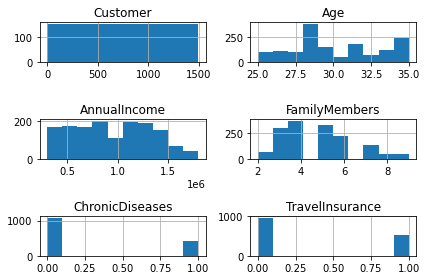

In [12]:
train_df.hist()
plt.tight_layout()

In [13]:
test_df.dtypes

Customer                int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
dtype: object

In [14]:
all_columns = train_df.columns
columns_not_selected = train_df.select_dtypes(['int']).columns
difference = all_columns.difference(columns_not_selected)
print(f"Columnas seleccionadas: {difference.tolist()}")
print("="*25)
print(f"Columnas no selecciondas: {columns_not_selected.tolist()}")
print("="*25)
print(f"Cantidad de elementos únicos por columna seleccionada")
print("="*25)
for column in difference:
    s = train_df[column].unique().size
    print(f"{column} tiene {s} elementos únicos")
    print(f"{test_df[column].unique()}")
print(f"Cantidad de elementos únicos por columna no seleccionada")
print("="*25)
for column in columns_not_selected:
    s = train_df[column].unique().size
    print(f"{column} tiene {s} elementos únicos")

Columnas seleccionadas: ['Employment Type', 'EverTravelledAbroad', 'FrequentFlyer', 'GraduateOrNot']
Columnas no selecciondas: ['Customer', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']
Cantidad de elementos únicos por columna seleccionada
Employment Type tiene 2 elementos únicos
['Private Sector/Self Employed' 'Government Sector']
EverTravelledAbroad tiene 2 elementos únicos
['No' 'Yes']
FrequentFlyer tiene 2 elementos únicos
['No' 'Yes']
GraduateOrNot tiene 2 elementos únicos
['Yes' 'No']
Cantidad de elementos únicos por columna no seleccionada
Customer tiene 1490 elementos únicos
Age tiene 11 elementos únicos
AnnualIncome tiene 30 elementos únicos
FamilyMembers tiene 8 elementos únicos
ChronicDiseases tiene 2 elementos únicos
TravelInsurance tiene 2 elementos únicos


In [46]:
df_cat=train_df.drop(['Age','AnnualIncome','TravelInsurance'],axis=1).columns
df_cat

Index(['Customer', 'Employment Type', 'GraduateOrNot', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad'],
      dtype='object')

#### Customer

In [15]:
print(train_df.shape)
print(train_df.Customer.unique().size)

(1490, 10)
1490


Es el id del customer, si lo utilizamos overfitteamos. No es un buen dato para trabajar.

#### Age

In [16]:
train_df["Age"].describe()

count    1490.000000
mean       29.667114
std         2.880994
min        25.000000
25%        28.000000
50%        29.000000
75%        32.000000
max        35.000000
Name: Age, dtype: float64

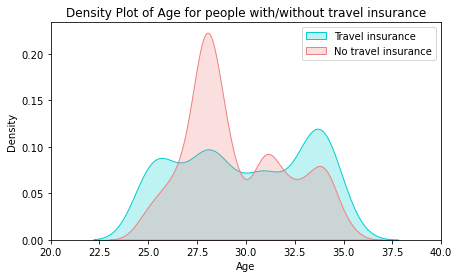

In [57]:
plt.figure(figsize=(7,4))
ax = seaborn.kdeplot(train_df["Age"][train_df.TravelInsurance == 1], color="darkturquoise", shade=True)
seaborn.kdeplot(train_df["Age"][train_df.TravelInsurance == 0], color="lightcoral", shade=True)
plt.legend(['Travel insurance', 'No travel insurance'])
plt.title('Density Plot of Age for people with/without travel insurance')
ax.set(xlabel='Age')
plt.xlim(20,40)
plt.show()

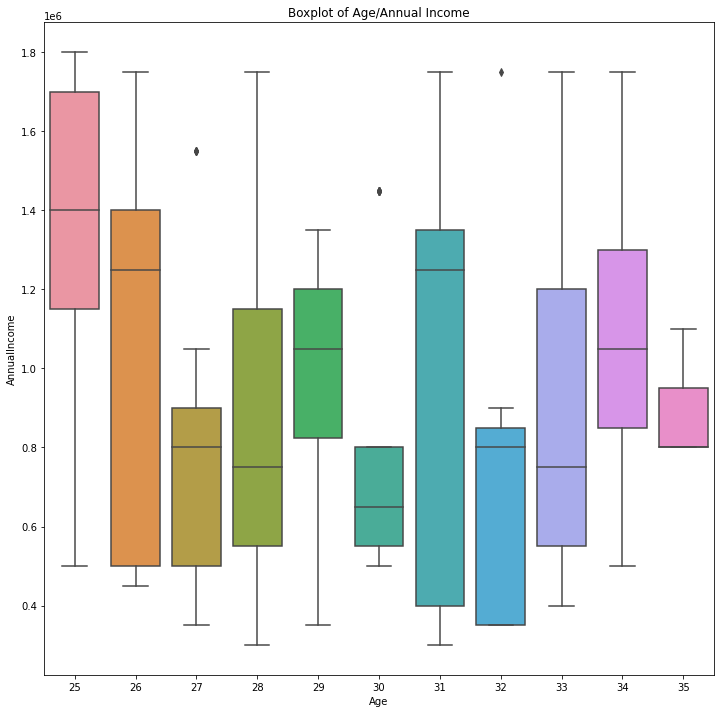

In [59]:
fig,ax=plt.subplots(figsize=(12,12))
seaborn.boxplot(x='Age',y='AnnualIncome',data=train_df)
plt.title('Boxplot of Age/Annual Income')
plt.show()

Dividir en decadas o cada 5?

#### Employment Type

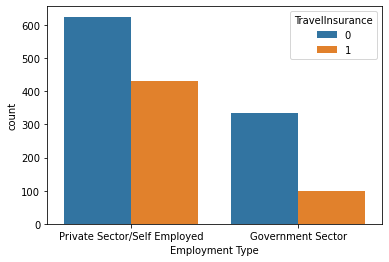

In [47]:
seaborn.countplot(data=train_df,x="Employment Type",hue='TravelInsurance')
plt.show()

#### GraduateOrNot

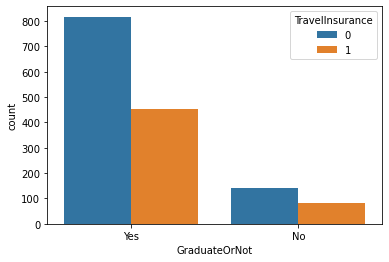

In [48]:
seaborn.countplot(data=train_df,x="GraduateOrNot",hue='TravelInsurance')
plt.show()

#### AnnualIncome

In [19]:
train_df['AnnualIncome'].describe().round(2)

count       1490.00
mean      927818.79
std       381171.55
min       300000.00
25%       600000.00
50%       900000.00
75%      1250000.00
max      1800000.00
Name: AnnualIncome, dtype: float64

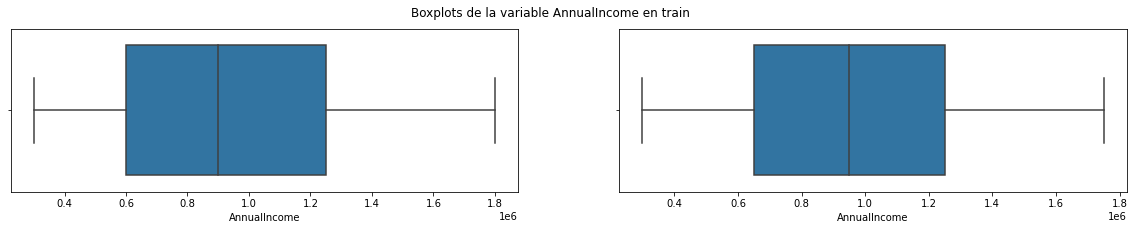

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(20,3))
seaborn.boxplot(x=train_df['AnnualIncome'], ax=ax[0])
seaborn.boxplot(x=test_df['AnnualIncome'], ax=ax[1])
plt.suptitle("Boxplots de la variable AnnualIncome en train")
plt.show()

#### FamilyMembers

Tiene sentido discrtizar. Familia Tipo, Familia +3, Familia Numerosa

usar kbinsdiscretizer

In [21]:
train_df['FamilyMembers'].describe()

count    1490.000000
mean        4.777181
std         1.640248
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: FamilyMembers, dtype: float64

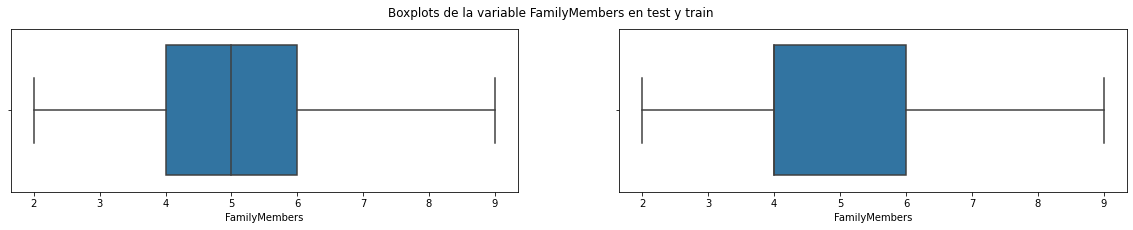

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(20,3))
seaborn.boxplot(x=train_df['FamilyMembers'], ax=ax[0])
seaborn.boxplot(x=test_df['FamilyMembers'], ax=ax[1])
plt.suptitle("Boxplots de la variable FamilyMembers en test y train")
plt.show()

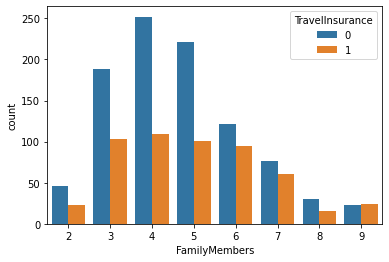

In [49]:
seaborn.countplot(data=train_df,x="FamilyMembers",hue='TravelInsurance')
plt.show()

#### ChronicDiseases

In [23]:
train_df["ChronicDiseases"].unique().tolist()

[0, 1]

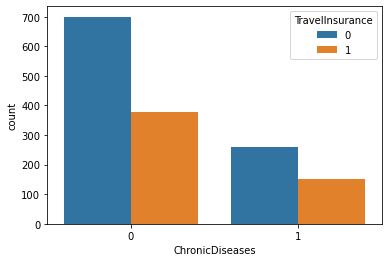

In [50]:
seaborn.countplot(data=train_df,x="ChronicDiseases",hue='TravelInsurance')
plt.show()

#### FrequentFlyer

In [25]:
train_df["FrequentFlyer"].unique().tolist()

['No', 'Yes']

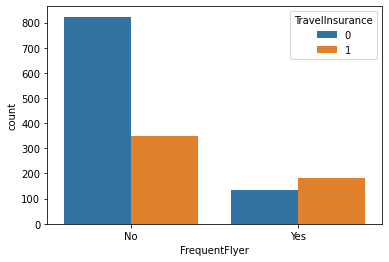

In [51]:
seaborn.countplot(data=train_df,x="FrequentFlyer",hue='TravelInsurance')
plt.show()

#### EverTravelledAbroad

In [27]:
train_df["EverTravelledAbroad"].unique().tolist()

['No', 'Yes']

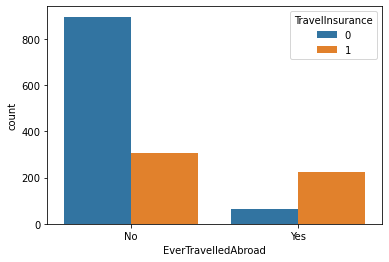

In [52]:
seaborn.countplot(data=train_df,x="EverTravelledAbroad",hue='TravelInsurance')
plt.show()

#### TravelInsurance

In [29]:
train_df["TravelInsurance"].unique().tolist()

[1, 0]

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

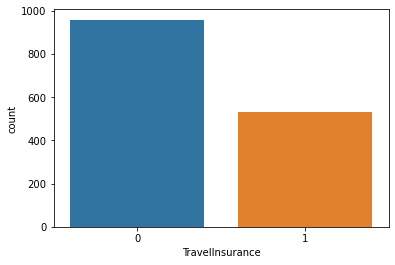

In [30]:
seaborn.countplot(x=train_df["TravelInsurance"])

Es el target. Sus datos son 0 o 1

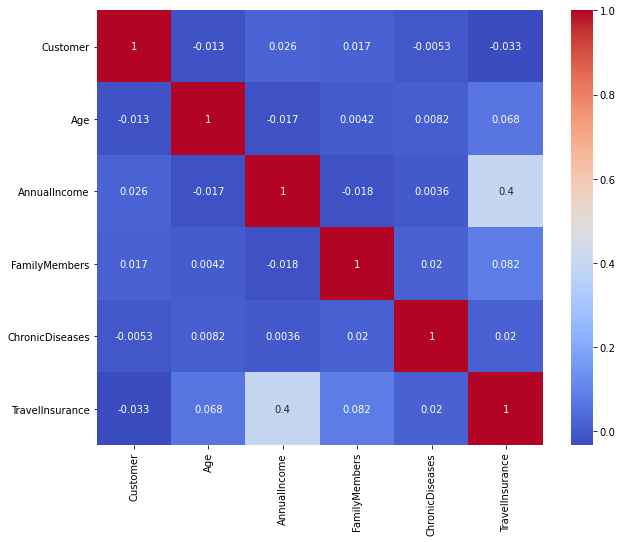

In [58]:
figure = plt.figure(figsize=(10,8))
seaborn.heatmap(train_df.corr(),annot=True, cmap='coolwarm')
plt.show()

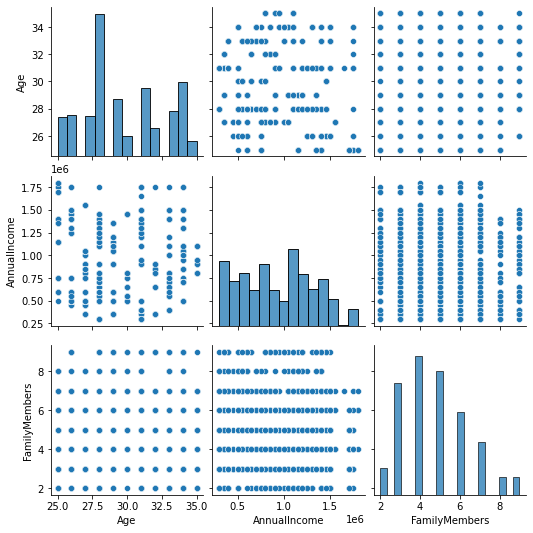

In [60]:
seaborn.pairplot(train_df[["Age","AnnualIncome","FamilyMembers"]])